In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
xls = pd.ExcelFile('20211121MLWData_Hasan.xlsx')
xls.sheet_names

['WebPagesForHelp',
 'Info',
 'MLCategory',
 'All-G213',
 'LongMLW',
 'SurveyLongSumsSUPFISH',
 'MLWData',
 'ExtraDatFromGasperMay2021',
 'PivotDuplicates',
 'PivotBasics',
 'PivotBasicStats',
 'PivotBasicStats30-2511m',
 'PivotDirtiestSeaMFSD',
 'PivotThresholdMFSD-30-2511m',
 'PivotSUPFISHSharesNoWax-Oct21',
 'PivotPackagingSharesNoWax-Oct',
 'PivotTopTenNoWax-Oct21',
 'PivotEachCountryNoWax-Oct21',
 'PivotEachSeaNoWax-Oct21',
 'PivotAnnualPackNoWax-Oct21',
 'PivotAnnualSeaNoWax-Oct21',
 'PivotAnnualSea-Oct21',
 'PivotAnnualSea',
 'PivotWRONGAnnualEachSea',
 'PivotBasicStats1',
 'PivotStationMap',
 'PivotBeachLengthFreq',
 'PivotBeachLengthFreq (2)',
 'PivotBeachLengthFreqStDev',
 'BeachLengthNormalityTest1',
 'PivotCommunityEngagement',
 'PivotAverageLakeRiverSea',
 'PivotCategoriesRiverLakeSea',
 'PivotNonEUCountries',
 'PivotDirtiestSeasOLD',
 'PivotEventAveragesT-test',
 'PivotCategoryAverages',
 'PivotCategoriesRegSeas',
 'PivotTemporalCategories',
 'PivotTopTenMonitClean',
 'Pi

In [4]:
mlw_data = pd.read_excel('20211121MLWData_Hasan.xlsx', sheet_name='MLWData')
mlw_cat = pd.read_excel('20211121MLWData_Hasan.xlsx', sheet_name='MLCategory')
mlw_Gcodes = pd.read_excel('20211121MLWData_Hasan.xlsx', sheet_name='LongMLW')

In [5]:
mlw_data.shape

(3509, 196)

In [6]:
mlw_data.columns[0:33]

Index(['SurveyNo', 'CommunityCode', 'SurveyCodeVlad', 'BeachCodeVlad',
       'EventCodePeter', 'BeachCodePeter', 'CommunityName', 'BeachName',
       'Country', 'BeachLength_m', 'BeachLocation', 'BeachType', 'EventDate',
       'EventType', 'NatRef', 'lon_x1', 'lat_y1', 'lon_x2', 'lat_y2',
       'BeachRegionalSea', 'BeachNamesCorrected',
       'BeachLengthAccToBaseline/Threshold', 'SurveyLengthVlad',
       'SeaBeach(Y/N)', 'BeachLengthMeasured(m)', 'NonSeaBeach(Y/N)',
       'IfNotSeaWhatItis', 'InEurope(Y/N)', 'Duplicate?', 'KideysNotes',
       'TotalLitterItems/beach', 'TotalLitterItems/100mbeach', 'G1'],
      dtype='object')

In [7]:
column_names = ['SurveyNo','EventCodePeter', 'CommunityCode', 'BeachName','Country','BeachLength_m',
                'BeachLocation', 'BeachType','EventDate','EventType','BeachRegionalSea',
                'SeaBeach(Y/N)', 'BeachLengthMeasured(m)', 'NonSeaBeach(Y/N)',
                'IfNotSeaWhatItis', 'InEurope(Y/N)', 'Duplicate?',
                'TotalLitterItems/beach', 'TotalLitterItems/100mbeach','KideysNotes','lon_x1', 'lat_y1','G213']
#mlw = mlw_data.loc[:, column_names]
mlw = mlw_data.copy()

In [8]:
mlw.shape

(3509, 196)

In [9]:
# to see how many non zero values of column 'G213' we have:
# mlw_data['G213'].fillna(0).astype(bool).sum()

In [10]:
# exclude 'G213' data
mlw['G213'] = 0

In [11]:
mlw['TOTML_BEACH'] = mlw.iloc[:,32:196].sum(axis=1)

In [12]:
mlw['TOTML_100m'] = 100 * mlw['TOTML_BEACH']/mlw['BeachLength_m']

## Exclude Values:
Exclude: Duplicates, zero values, test, micro&meso G code values, Paraffi/Waxn G213,  no location, outside Europe, land, ofshore, forest, (sometimes river or canal together, as in the case of some Denmark surveys), eventcode N/A, etc,

In [13]:
mlw = mlw.drop(mlw[mlw['KideysNotes'] == 'test'].index)

# Drop rows that have NaN values for 'TotalLitterItems/beach': # Either way works below
# mlw = mlw[mlw['TotalLitterItems/beach'].notnull()]
mlw.dropna(subset=['TOTML_BEACH'], how='any', inplace=True)

# Drop rows that are 'Duplicate?'=='Y'
mlw = mlw.drop(mlw[mlw['Duplicate?']=='Y'].index)
# mlw.drop_duplicates(subset=['SurveyNo'],inplace=True) 

# Drop rows that aren't in the EU:
mlw = mlw.drop(mlw[ (mlw['InEurope(Y/N)'] == 'N') ].index)

In [14]:
mlw.shape

(3346, 198)

In [15]:
# only keep SeaBeach 
mlw = mlw.drop(mlw[mlw['IfNotSeaWhatItis'] != 'SeaBeach'].index)
#mlw = mlw[mlw['IfNotSeaWhatItis'] == 'SeaBeach']

# Drop 'EventCodePeter' missing values
mlw.dropna(subset=['EventCodePeter'], how='any', inplace=True)

# Drop missing values of 'TOTML_BEACH'
mlw.dropna(subset=['TOTML_BEACH'], how='any', inplace=True)

# Drop 0 values of 'TOTML_BEACH'
mlw = mlw.drop(mlw[mlw['TOTML_BEACH'] == 0].index)

# Keep 'BeachLength_m' at the specified range
mlw = mlw.drop(mlw[  (mlw['BeachLength_m'] <= 89) | (mlw['BeachLength_m'] >= 851) ].index )

# Drop Caspian Sea Data
mlw = mlw.drop(mlw[mlw['BeachRegionalSea'] == 'Caspian'].index)

In [16]:
# When you have a column (and not an index) of pandas Timestamps, you can access many more extra properties and methods with the dt accessor
# Add a year column to the mlw dataframe
YearColumn = mlw['EventDate'].dt.to_period('Y')
mlw['YearColumn'] = YearColumn

# Drop data from 2021 
mlw = mlw.drop(mlw[mlw['YearColumn'] == '2021'].index)

In [17]:
#Good ways: indexing, returns view

#mlw.iloc[1,7]
#mlw.iat[1,7]
#mlw.at[1,'Country']
#mlw.loc[mlw.Country == 'TR', 'BeachName']

#Bad ways: slicing, returns copy, with this way you shouldn't get a SettingWithCopyWarning

#mlw['Country']=='IT'

In [18]:
# Reset Index after dropping some rows
mlw.reset_index(drop=True, inplace=True)

In [19]:
mlw['TOTML_BEACH'].sum()

1178143.0

In [20]:
mlw['TOTML_100m'].sum()

823458.0054772804

## Create the first bar chart - Median Total Litter of 100m Beach per year


In [21]:
# with groupby and pd.plot;

#mlw_bar = mlw.groupby(by=mlw['YearColumn'])['TotalLitterItems/100mbeach'].median()
#mlw_bar.plot.bar(figsize=(12,6))

In [22]:
mlw_bar1 = pd.pivot_table(mlw, index=["YearColumn"], values=['TOTML_100m'], aggfunc=np.median)
mlw_bar1

,TOTML_100m
YearColumn,
2013,100.000000
2014,165.267176
2015,197.000000
2016,196.078431
2017,389.770355
2018,291.059603
2019,193.733333
2020,243.072344


<Figure size 864x432 with 0 Axes>

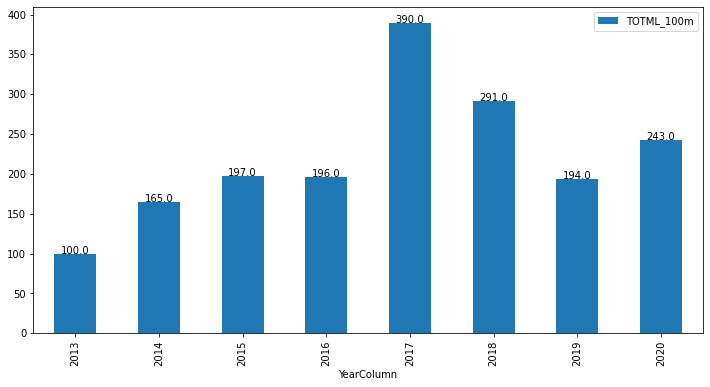

In [23]:
#ax = mlw_bar1.plot(kind='bar',figsize=(12,6))
#ax.patches

plt.figure(figsize = (12, 6))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i].round(), ha = 'center')

x = mlw_bar1.index
y = mlw_bar1['TOTML_100m'] 

mlw_bar1.plot.bar(figsize=(12,6))
addlabels(x, y)


In [24]:
mlw['BeachRegionalSea'].value_counts()

Mediterranean Sea            747
North-east Atlantic Ocean    453
Black Sea                    164
Baltic Sea                    76
Name: BeachRegionalSea, dtype: int64

In [25]:
mlw_bar2 = pd.pivot_table(mlw, index=["YearColumn"],columns=['BeachRegionalSea'], values=['TOTML_100m'], aggfunc=np.median)
mlw_bar2

TOTML_100m                                 \
BeachRegionalSea  Baltic Sea    Black Sea Mediterranean Sea   
YearColumn                                                    
2013              107.264957          NaN        112.135786   
2014               43.998882   375.490196        184.918367   
2015               70.338384   214.859438        332.673267   
2016              129.000000   689.976190        429.542484   
2017              118.560606  1025.989555        410.101010   
2018               97.000000   365.384615        410.101010   
2019               61.731535   833.333333        253.571429   
2020               33.166667   474.509804         98.006357   

                                            
BeachRegionalSea North-east Atlantic Ocean  
YearColumn                                  
2013                             95.000000  
2014                            115.000000  
2015                             81.000000  
2016                             83.014354  
2017                            101.000000  
2018                             89.000000  
2019                            162.123810  
2020                             31.000000

In [26]:
mlw3 = mlw_bar2['TOTML_100m']['Baltic Sea']
mlw3

YearColumn
2013    107.264957
2014     43.998882
2015     70.338384
2016    129.000000
2017    118.560606
2018     97.000000
2019     61.731535
2020     33.166667
Freq: A-DEC, Name: Baltic Sea, dtype: float64

In [27]:
#def addlabels(x,y):
#    for i in range(len(x)):
#        plt.text(i, y[i], y[i].round(), ha = 'center')
        
#mlw3.plot.bar(figsize=(12,6))
#addlabels(x, y)


##  Grouped Bar chart - The 4 different sea Beaches totalLitter per Year

<AxesSubplot:xlabel='YearColumn'>

<Figure size 864x432 with 0 Axes>

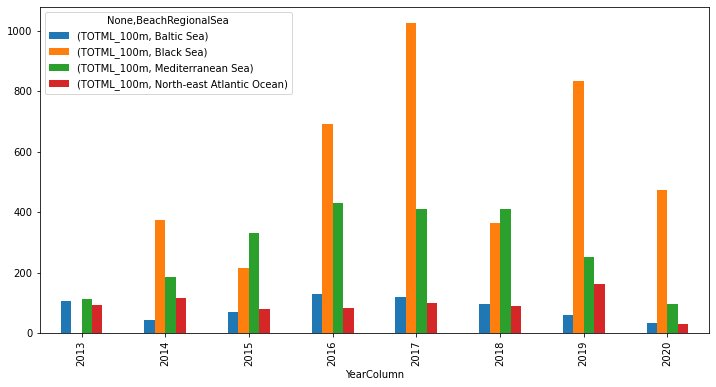

In [28]:
plt.figure(figsize = (12, 6))

mlw_bar2.plot.bar(figsize=(12,6))


# Analyzing each materials total amount on Beach
### Artificial polymer materials(Plastic) ---> 86% of the total amount of Marine Litter for the analyzed dataset

mlw_cat,mlw_material,mlw_Gcodes,mlw_shares,mlw_joinedGs,mlw_groups_tot

In [29]:
pd.set_option('display.max_columns', None)
mlw_cat.head()

,BizimGecmistekiSayıKodu,Bizim Gye cevirmek icin Kod Plaj,MFSD2013,B-Code,B-AGGREGATEDNAME,B-TA,B-SUP,B-FISH,B-BAG,OSPAR- Code,UNEP- Code,Bizim UNEP Ocak2020ye kadar,Bizim Aciklama,TürkçeÇöpİsmi,General Name,Level 1 - Materials,Core,Beach,Seafloor,Floating,Biota,B-code2,SUP-FISH-TA-PACKING,JRC2017-SUP,JRC2017-Fishery,Joana Packaging: Y/N,Andrea Packaging Y/N,AndreaWinterstetterNotes
0,24,PL05,G1,B1,"4/6-pack yokes, six-pack rings",X,X,-,-,1,PL05,PL05,NaN,halka çoklu içecek taşıyıcıları,"4/6-pack yokes, six-pack rings",Artificial polymer materials,x,x,NaN,NaN,NaN,SUP,SUP+Packaging,Y,N,Y,Y,see her email dated 16Nov2021
1,NaN,NaN,G2,B2,Plastic bags and parts/remains,X,X,-,X,NaN,PL07,YOK,NaN,NaN,Bags,Artificial polymer materials,x,NaN,x,x,NaN,SUP,SUP+Packaging,Y,N,Y,Y,NaN
2,27,PL08A,G3,B2,Plastic bags and parts/remains,X,X,-,X,2,PL07,PL08A,NaN,alışveriş poşet/çantaları ve parçaları,Shopping Bags incl. pieces,Artificial polymer materials,NaN,x,NaN,NaN,NaN,SUP,SUP+Packaging,Y,N,Y,Y,NaN
3,28,PL08B,G4,B2,Plastic bags and parts/remains,X,X,-,X,3,PL07,PL08B,NaN,"küçük poşetler (buzdolabı poşeti, buzlık poşet...","Small plastic bags, e.g. freezer bags incl. pi...",Artificial polymer materials,NaN,x,NaN,NaN,NaN,SUP,SUP+Packaging,Y,N,Y,Y,NaN
4,29,PL08C,G5,B2,Plastic bags and parts/remains,X,X,-,X,112,NaN,PL08C,NaN,poşetlerin toplu tutacak kısımları,Plastic bag collective role; what remainsfrom ...,Artificial polymer materials,NaN,x,NaN,NaN,NaN,SUP,SUP+Packaging,Y,N,Y,Y,NaN


In [30]:
mlw_cat.shape

(219, 28)

In [31]:
mlw_material = mlw_cat['Level 1 - Materials']
mlw_material.value_counts()

Artificial polymer materials    125
Metal                            26
Processed/worked wood            15
Paper/Cardboard                  13
Cloth/textile                    12
Glass/ceramics                   11
Rubber                           10
unidentified                      2
Chemicals                         2
undefined                         1
Food waste                        1
Name: Level 1 - Materials, dtype: int64

In [32]:
mlw['G1'].sum()

3276.0

In [33]:
# filter all columns of different material 
mlw.iloc[:,32:196]

,G1,G3,G4,G5,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,G17,G18,G19,G21,G22,G23,G24,G25,G26,G27,G28,G29,G30,G31,G32,G33,G34,G35,G36,G37,G40,G41,G42,G43,G44,G45,G46,G47,G49,G50,G52,G53,G54,G56,G57,G58,G59,G60,G62,G63,G64,G65,G66,G67,G68,G69,G70,G71,G72,G73,G76,G77,G79,G80,G82,G83,G84,G85,G86,G87,G88,G89,G90,G91,G92,G93,G95,G96,G97,G98,G99,G100,G101,G102,G124,G125,G126,G127,G128,G129,G130,G131,G132,G133,G134,G137,G138,G139,G140,G141,G142,G143,G144,G145,G147,G148,G150,G151,G152,G153,G154,G155,G156,G158,G159,G160,G161,G162,G163,G164,G165,G166,G167,G171,G172,G174,G175,G176,G177,G178,G179,G180,G181,G182,G184,G186,G187,G188,G189,G190,G191,G193,G194,G195,G198,G199,G200,G201,G202,G203,G204,G205,G206,G207,G208,G210,G211,G213,G301,G302
0,1.0,NaN,NaN,1.0,11.0,3.0,4.0,5.0,NaN,3.0,7.0,1.0,NaN,NaN,NaN,1.0,NaN,81.0,NaN,NaN,NaN,NaN,7.0,67.0,7.0,NaN,2.0,NaN,7.0,7.0,33.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,40.0,3.0,NaN,12.0,8.0,NaN,1.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,1.0,2.0,NaN,2.0,9.0,NaN,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN,11.0,5.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,8.0,NaN,1.0,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,NaN,NaN,NaN,4.0,NaN,7.0,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,2.0,NaN,0,NaN,NaN
1,NaN,NaN,15.0,NaN,33.0,28.0,6.0,5.0,NaN,4.0,NaN,3.0,1.0,NaN,1.0,NaN,NaN,117.0,NaN,NaN,NaN,NaN,4.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2116.0,NaN,NaN,NaN,1.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,12.0,8.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,22.0,NaN,5.0,NaN,5.0,NaN,NaN,NaN,2.0,NaN,NaN,10.0,NaN,NaN,348.0,NaN,21.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,21.0,NaN,15.0,1.0,16.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,1.0,54.0,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0,NaN,NaN
2,NaN,10.0,NaN,NaN,NaN,NaN,1.0,9.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,14.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,110.0,NaN,NaN,0,NaN,NaN
3,NaN,7.0,NaN,NaN,1.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,3.0,5.0,NaN,98.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,1.0,9.0,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,14.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN,1.0,9.0,NaN,NaN,NaN,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,6.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,5.0,NaN,NaN,1.0,10.0,NaN,NaN,NaN,85.0,NaN,NaN,0,NaN,NaN
4,NaN,1.0,0.0,NaN,1.0,1.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [34]:
mlw_shares = mlw.iloc[:,32:196].sum().to_frame()

In [35]:
mlw_shares

,0
G1,3276.0
G3,33736.0
G4,16266.0
G5,4193.0
G7,18658.0
...,...
G210,5976.0
G211,633.0
G213,0.0
G301,35.0


In [36]:
mlw_shares.reset_index(inplace=True)

In [37]:
mlw_shares.rename(columns={'index': 'MFSD2013', 0: 'SumGs'}, inplace=True)

In [38]:
mlw_shares.columns

Index(['MFSD2013', 'SumGs'], dtype='object')

In [39]:
mlw_shares

,MFSD2013,SumGs
0,G1,3276.0
1,G3,33736.0
2,G4,16266.0
3,G5,4193.0
4,G7,18658.0
...,...,...
159,G210,5976.0
160,G211,633.0
161,G213,0.0
162,G301,35.0


In [40]:
# Description of the G codes 
mlw_cat2 = mlw_cat[['MFSD2013','Level 1 - Materials']]
mlw_cat2

,MFSD2013,Level 1 - Materials
0,G1,Artificial polymer materials
1,G2,Artificial polymer materials
2,G3,Artificial polymer materials
3,G4,Artificial polymer materials
4,G5,Artificial polymer materials
...,...,...
214,G215,Food waste
215,G216,undefined
216,G217,unidentified
217,G301,Cloth/textile


In [41]:
# example of .merge() 
df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]})
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'c': [3, 4]})
df1.merge(df2, how='outer', on='a')

,a,b,c
0,foo,1.0,3.0
1,bar,2.0,NaN
2,baz,NaN,4.0


In [42]:
mlw_joinedGs = mlw_shares.merge(mlw_cat2, how='inner', on='MFSD2013')

In [43]:
mlw_joinedGs

,MFSD2013,SumGs,Level 1 - Materials
0,G1,3276.0,Artificial polymer materials
1,G3,33736.0,Artificial polymer materials
2,G4,16266.0,Artificial polymer materials
3,G5,4193.0,Artificial polymer materials
4,G7,18658.0,Artificial polymer materials
...,...,...,...
159,G210,5976.0,Glass/ceramics
160,G211,633.0,unidentified
161,G213,0.0,Chemicals
162,G301,35.0,Cloth/textile


In [44]:
mlw_groups_tot = pd.pivot_table(mlw_joinedGs, index=["Level 1 - Materials"], values=['SumGs'], aggfunc=np.sum)

In [45]:
mlw_groups_tot

,SumGs
Level 1 - Materials,
Artificial polymer materials,1014741.0
Chemicals,0.0
Cloth/textile,16591.0
Glass/ceramics,57910.0
Metal,39122.0
Paper/Cardboard,27669.0
Processed/worked wood,13179.0
Rubber,8298.0
unidentified,633.0


In [46]:
mlw_groups_tot.iloc[2]

SumGs    16591.0
Name: Cloth/textile, dtype: float64

In [47]:
# Percentage of the different types of Materials in all the litter
listMaterials = []
for i in range(9):
    answer = 100 * (mlw_groups_tot.iloc[i] / mlw_groups_tot['SumGs'].sum())
    listMaterials.append(answer)
print(listMaterials)

[SumGs    86.130546
Name: Artificial polymer materials, dtype: float64, SumGs    0.0
Name: Chemicals, dtype: float64, SumGs    1.408233
Name: Cloth/textile, dtype: float64, SumGs    4.915363
Name: Glass/ceramics, dtype: float64, SumGs    3.32065
Name: Metal, dtype: float64, SumGs    2.348526
Name: Paper/Cardboard, dtype: float64, SumGs    1.118625
Name: Processed/worked wood, dtype: float64, SumGs    0.704329
Name: Rubber, dtype: float64, SumGs    0.053729
Name: unidentified, dtype: float64]


# Calculate Confidence Interval

In [48]:
# Found 2 different scripts on github, use whichever
import statistics, math
import pandas as pd 


y12 = mlw['TotalLitterItems/beach'].array # my addition

def median_confidence_interval(dx,cutoff=.95):
    ''' cutoff is the significance level as a decimal between 0 and 1'''
    dx = dx.sort_values(ascending=True, ignore_index=True)
    factor = statistics.NormalDist().inv_cdf((1+cutoff)/2)
    factor *= math.sqrt(len(dx)) # avoid doing computation twice

    lix = round(0.5*(len(dx)-factor))
    uix = round(0.5*(1+len(dx)+factor))

    return (dx[lix],dx[uix])

#a = np.array([24, 38, 61, 22, 16, 57, 31, 29, 35])
y12 = mlw['TOTML_BEACH']
print(median_confidence_interval(y12))

(324.0, 406.0)


In [49]:
mlw['TOTML_BEACH'].median()

371.0

In [50]:
import pandas as pd
import numpy as np
import scipy.stats as stats


def medianCI(data, ci, p):
    '''
    data: pandas datafame/series or numpy array
    ci: confidence level
    p: percentile' percent, for median it is 0.5
    output: a list with two elements, [lowerBound, upperBound]
    '''
    if type(data) is pd.Series or type(data) is pd.DataFrame:
        #transfer data into np.array
        data = data.values

    #flat to one dimension array
    data = data.reshape(-1)
    data = np.sort(data)
    N = data.shape[0]

    lowCount, upCount = stats.binom.interval(ci, N, p, loc=0)
    #given this: https://onlinecourses.science.psu.edu/stat414/node/316
    #lowCount and upCount both refers to  W's value, W follows binomial Dis.
    #lowCount need to change to lowCount-1, upCount no need to change in python indexing
    lowCount -= 1
    # print lowCount, upCount
    return data[int(lowCount)], data[int(upCount)]
""" 
if __name__ == '__main__':
    data = np.random.random(100)
    data = pd.Series(data)
    print(medianCI(data, 0.95, 0.5))
"""
#if __name__ == '__main__':
#    data = mlw['TOTML_BEACH']
#    data = pd.Series(data)
#    print(medianCI(data, 0.95, 0.5))
    

" \nif __name__ == '__main__':\n    data = np.random.random(100)\n    data = pd.Series(data)\n    print(medianCI(data, 0.95, 0.5))\n"

In [51]:
mlw_bar1 = pd.pivot_table(mlw, index=["YearColumn"], values=['TOTML_100m'], aggfunc=np.median)
mlw_bar1

,TOTML_100m
YearColumn,
2013,100.000000
2014,165.267176
2015,197.000000
2016,196.078431
2017,389.770355
2018,291.059603
2019,193.733333
2020,243.072344


In [52]:
# For year 2013 the median value of the litter from the data collected was
year = 2013
mlw[mlw['YearColumn']==str(year)]['TOTML_100m'].median()

100.0

In [53]:
year = 2013
for i in range(8):
    data1 = mlw[mlw['YearColumn']==str(year)]['TOTML_100m']
    medianVal = round(data1.median(),1)
    data = data1
    data = pd.Series(data)
    print(f"for the year {year}: the median is: {medianVal} and the confidence interval is: {medianCI(data, 0.95, 0.5)}")
    year += 1


for the year 2013: the median is: 100.0 and the confidence interval is: (76.0, 158.8235294117647)
for the year 2014: the median is: 165.3 and the confidence interval is: (115.0, 261.0)
for the year 2015: the median is: 197.0 and the confidence interval is: (100.68027210884354, 284.1121495327103)
for the year 2016: the median is: 196.1 and the confidence interval is: (134.0, 288.0)
for the year 2017: the median is: 389.8 and the confidence interval is: (308.7378640776699, 438.3838383838384)
for the year 2018: the median is: 291.1 and the confidence interval is: (244.0, 373.0)
for the year 2019: the median is: 193.7 and the confidence interval is: (165.0, 249.73333333333332)
for the year 2020: the median is: 243.1 and the confidence interval is: (68.54838709677419, 389.5734597156398)


# % of Top Ten Items at EU Beaches - barh

In [54]:
# Description of the different types of litter found in eu beaches
pd.set_option('display.max_rows', None)
mlw_cat['General Name'].value_counts()

Octopus pots                                                          2
Gloves                                                                1
Styrofoam <5mm                                                        1
Combs/hair brushes/sunglasses                                         1
Toys and party poppers                                                1
Food waste (galley waste)                                             1
Fibre glass/fragments                                                 1
Tobacco pouches / plastic cigarette boxpackaging                      1
Cartons/Tetrapack Milk                                                1
Aerosol/Spray cans industry                                           1
Buckets                                                               1
Cardboard (boxes & fragments)                                         1
Mesh vegetable bags                                                   1
Jerry cans (square plastic containerswith handle)               

In [55]:
mlw_name_litter = mlw_cat[['MFSD2013','General Name']]
mlw_name_litter

,MFSD2013,General Name
0,G1,"4/6-pack yokes, six-pack rings"
1,G2,Bags
2,G3,Shopping Bags incl. pieces
3,G4,"Small plastic bags, e.g. freezer bags incl. pi..."
4,G5,Plastic bag collective role; what remainsfrom ...
5,G6,Bottles
6,G7,Drink bottles <=0.5l
7,G8,Drink bottles >0.5l
8,G9,Cleaner bottles & containers
9,G10,Food containers incl. fast food containers


In [56]:
mlw_shares

,MFSD2013,SumGs
0,G1,3276.0
1,G3,33736.0
2,G4,16266.0
3,G5,4193.0
4,G7,18658.0
5,G8,15707.0
6,G9,2860.0
7,G10,17710.0
8,G11,1438.0
9,G12,1689.0


In [57]:
mlw_join_litter = mlw_shares.merge(mlw_name_litter, how='inner', on='MFSD2013')

# add a 'percentSumGs' column
mlw_join_litter['percentSumGs'] = (mlw_join_litter['SumGs'] / mlw_join_litter['SumGs'].sum()) * 100

In [58]:
mlw_join_litter

,MFSD2013,SumGs,General Name,percentSumGs
0,G1,3276.0,"4/6-pack yokes, six-pack rings",0.278065
1,G3,33736.0,Shopping Bags incl. pieces,2.863489
2,G4,16266.0,"Small plastic bags, e.g. freezer bags incl. pi...",1.380647
3,G5,4193.0,Plastic bag collective role; what remainsfrom ...,0.355899
4,G7,18658.0,Drink bottles <=0.5l,1.583679
5,G8,15707.0,Drink bottles >0.5l,1.333200
6,G9,2860.0,Cleaner bottles & containers,0.242755
7,G10,17710.0,Food containers incl. fast food containers,1.503213
8,G11,1438.0,Beach use related cosmetic bottles andcontaine...,0.122056
9,G12,1689.0,Other cosmetics bottles & containers,0.143361


In [59]:
mlw_join_litter.sort_values(by='percentSumGs', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

In [60]:
mlw_top_ten = mlw_join_litter[[ 'percentSumGs','General Name' ]][-10:]
mlw_top_ten

,percentSumGs,General Name
31,2.097538,Straws and stirrers
158,2.353195,Glass or ceramic fragments >2.5cm
43,2.585679,String and cord (diameter less than 1cm)
1,2.863489,Shopping Bags incl. pieces
26,3.071953,Crisp packets/Sweet wrappers
80,3.635807,Cotton bud sticks
17,4.320698,Plastic caps/Drink lids
68,5.747435,Polystyrene pieces 2.5 cm > < 50cm
66,8.711167,Plastic pieces 2.5 cm > < 50cm
23,23.966445,Cigarette butts and filters


In [61]:
round(mlw_top_ten['percentSumGs'],4).to_list()

[2.0975,
 2.3532,
 2.5857,
 2.8635,
 3.072,
 3.6358,
 4.3207,
 5.7474,
 8.7112,
 23.9664]

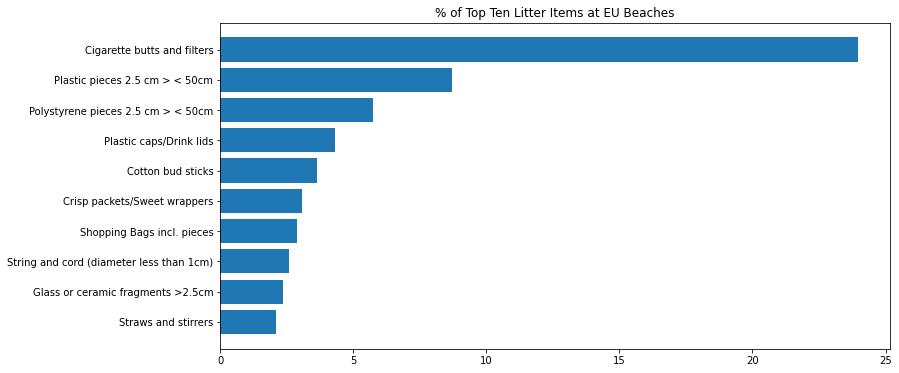

" \ni = 0\nfor p in ax.patches:\n    width = ax.patches.get_width()\n    height = ax.get_height()\n    x, y = ax.get_xy()\n     \n    plt.text(x+width/2,\n             y+height*1.01,\n             str(mlw_top_ten['percentSumGs'][i])+'%',\n             ha='center',\n             weight='bold')\n    i += 1\n"

In [62]:
#plt.figure(figsize=(10,5))
fig, ax = plt.subplots(figsize=(12,6))

ax = plt.barh(y=mlw_top_ten['General Name'],width=mlw_top_ten['percentSumGs'])
plt.title('% of Top Ten Litter Items at EU Beaches')

plt.show()

""" 
i = 0
for p in ax.patches:
    width = ax.patches.get_width()
    height = ax.get_height()
    x, y = ax.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01,
             str(mlw_top_ten['percentSumGs'][i])+'%',
             ha='center',
             weight='bold')
    i += 1
""" 